Stochastic Modelling and Simulation project:
Multi-Robot Target Search using Probabilistic Consensus on Discrete Markov Chains.

In [1]:
import numpy as np
from Utils.Agent import Agent
from Utils.GridGraph import GridGraph
from MultiRobotTargetSearch import MultiRobotTargetSearch
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
np.random.seed(12345)


Experimental parameter:

In [3]:
N = 3 # number of agents

alpha = 0.08 # to be chosen in (0, 1/d_max) <- d_max = N-1

map_width = 3 # (meters)
map_height = 3

S = map_width * map_height # number of nodes (locations)


Graph initialization:

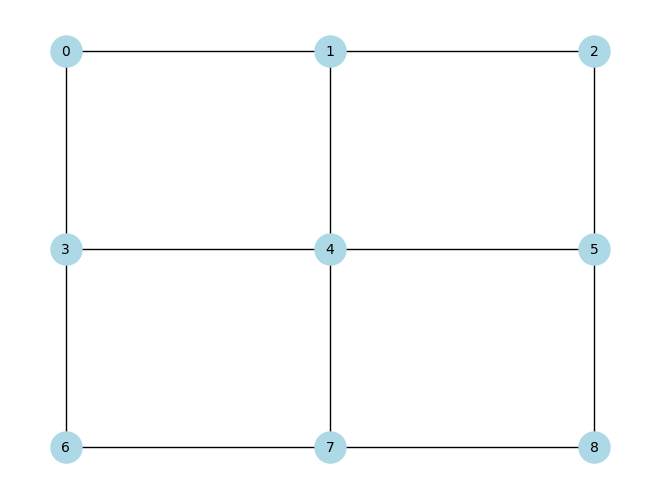

In [4]:
grid_graph = GridGraph(map_width, map_height)
grid_graph.plot_graph() 

Target init:

In [5]:
reference_information_state = 1
Z_r = [4, 5, 6] 
print("The reference information state is: " + str(reference_information_state))
print("Target is observable from nodes: " + str(Z_r))

The reference information state is: 1
Target is observable from nodes: [4, 5, 6]


Agents init:

In [6]:
def initAgents(number_of_agents, number_of_nodes):
    agent_list = []
    for i in range(number_of_agents):
        initial_node = np.random.randint(0, number_of_nodes)
        agent = Agent(i+1, initial_node)
        agent_list.append(agent)
    return agent_list    

agents = initAgents(N,S)
for ag in agents:
    print(ag)

Agent ID: 1, 
Position: 2 
Information state: 0.8901547142593231

Agent ID: 2, 
Position: 1 
Information state: 0.18391881167709445

Agent ID: 3, 
Position: 5 
Information state: 0.5320779204036645


Graph class representing agent's environment

In [7]:
experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
experiment.run()
print(f"Finished. Information State Vector: {experiment.getInformationStateVector()}")         
#print(f"{experiment.getIterationNumber()} iterazioni in {experiment.getExecutionTime()} secondi")

Finished. Information State Vector: [[1.]
 [1.]
 [1.]
 [1.]]


In [8]:
def plot_average_execution_time(agents_number_list, average_execution_time_list):
    plt.figure(figsize=(8, 6))
    plt.plot(agents_number_list, average_execution_time_list, marker='o', linestyle='-', color='b', label='Average Execution Time')
    plt.xlabel("Number of Agents")
    plt.ylabel("Average Execution Time (s)")
    plt.title("Average Execution Time vs Number of Agents")
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

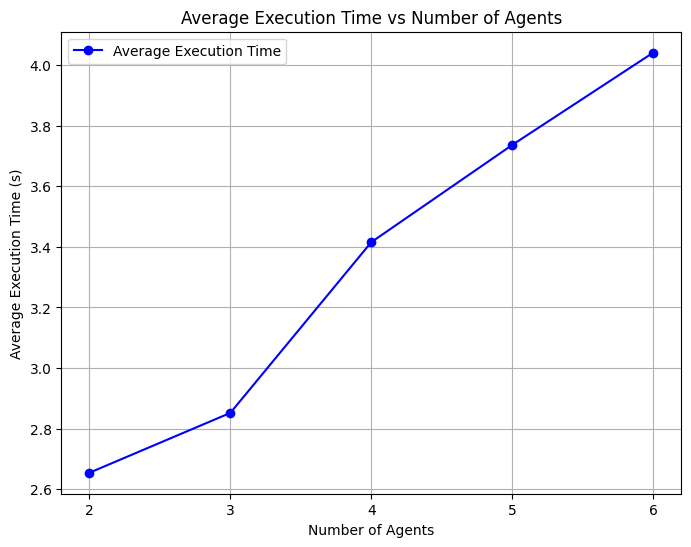

In [9]:
num_of_experiments = 1000
N = [2,3,4,5,6]
#N = [2,3,4,5,6,7,8,9,10,11,12]
average_execution_time = []
average_iterations = []
average_consensus_time = []

for agent_number in N:
    nodesNumber = grid_graph.getNodesNumber()
    count = 0
    consensus_times = []
    exec_time_sum = 0
    iterations_sum = 0
    alpha = 1 / (agent_number - 1)
    
    for j in range(num_of_experiments): 
        agents = initAgents(agent_number, nodesNumber)
        experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
        experiment.run()
        consensus_times.append(experiment.getMeanConsensusTime())
        #print(f"exec time at experiment {j}: {experiment.getExecutionTime()}")
        #exec_time_sum += experiment.getExecutionTime()
        #iterations_sum += experiment.getIterationNumber()
        #count+=1
    #print(f"average time: {exec_time_sum / count}")
    #average_execution_time.append(exec_time_sum / count)
    #average_iterations.append(iterations_sum / count)
    average_consensus_time.append(np.mean(consensus_times))

plot_average_execution_time(N, average_consensus_time)
# plot_average_execution_time(N, average_execution_time)
# plot_average_execution_time(N, average_iterations)
